In [1]:
import gymnasium as gym
import numpy as np
import os
import matplotlib.pyplot as plt
from agent.dqn_model import DQNTrainerSimplified
from utils.ModelVersionManager import ModelVersionManager
from customEnv.SimpleCornIrrigationEnv import SimpleCornIrrigationEnv

os.makedirs("./logs/dqn", exist_ok=True)
os.makedirs("./models", exist_ok=True)

In [2]:
env = SimpleCornIrrigationEnv(
    season_length=120,
    difficulty="normal",
    region_type="temperate",
    seed=42
)

In [3]:
modelManager = ModelVersionManager(base_dir="./models")

In [4]:
dqn_trainer = DQNTrainerSimplified(
    model_version_manager=modelManager,
    log_dir="./logs/dqn"
)

In [5]:
model, training_time, model_path = dqn_trainer.train(
        env=env,
        total_timesteps=50000,        # Total training steps
        learning_rate=0.0001,          # Initial learning rate
        buffer_size=10000,             # Experience replay buffer size
        exploration_steps=10000,       # Steps for epsilon decay
        initial_eps=1.0,               # Initial exploration rate
        final_eps=0.05,                # Final exploration rate
    )

d:\eamonn\TARUMT RDS\Y2S3\ML\Assignment\Intelligent_Irrigation_System\.venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=-608.08 +/- 165.50
Episode length: 120.00 +/- 0.00
New best mean reward!
Eval num_timesteps=10000, episode_reward=-153.51 +/- 82.93
Episode length: 120.00 +/- 0.00
New best mean reward!
Eval num_timesteps=15000, episode_reward=221.10 +/- 156.85
Episode length: 120.00 +/- 0.00
New best mean reward!
Eval num_timesteps=20000, episode_reward=840.06 +/- 207.28
Episode length: 120.00 +/- 0.00
New best mean reward!
Eval num_timesteps=25000, episode_reward=966.36 +/- 134.98
Episode length: 120.00 +/- 0.00
New best mean reward!
Eval num_timesteps=30000, episode_reward=1011.10 +/- 183.15
Episode length: 120.00 +/- 0.00
New best mean reward!
Eval num_timesteps=35000, episode_reward=1096.75 +/- 116.56
Episode length: 120.00 +/- 0.00
New best mean reward!
Eval num_timesteps=40000, episode_reward=1270.12 +/- 149.23
Episode length: 120.00 +/- 0.00
New best mean reward!
Eval num_timesteps=45000, episode_reward=1126.97 +/- 114.04
Episode length: 120.00 +/- 0.00
E

In [6]:
eval_result = dqn_trainer.evaluate(
    model=model,
    env=env,
    n_eval_episodes=10,
    deterministic=True
)

avg_reward = sum(r["total_reward"] for r in eval_result) / len(eval_result)
avg_yield = sum(r["final_yield"] for r in eval_result) / len(eval_result)
avg_water = sum(r["total_water_used"] for r in eval_result) / len(eval_result)

print(f"Average Reward: {avg_reward:.2f}")
print(f"Average Yield: {avg_yield:.2f}")
print(f"Average Water Used: {avg_water:.2f} mm")

print("\nDetailed evaluation results:")
for i, result in enumerate(eval_result):
    print(f"Episode {i+1}: Reward={result['total_reward']:.2f}, "
            f"Yield={result['final_yield']:.2f}, "
            f"Water={result['total_water_used']:.1f}mm")


===== Evaluation Results =====
Episodes: 10
Average Reward: 1227.06
Average Yield: 1.61
Average Water Used: 186.00 mm
Average Reward: 1227.06
Average Yield: 1.61
Average Water Used: 186.00 mm

Detailed evaluation results:
Episode 1: Reward=1324.31, Yield=1.70, Water=195.0mm
Episode 2: Reward=954.55, Yield=1.43, Water=170.0mm
Episode 3: Reward=1434.66, Yield=1.93, Water=180.0mm
Episode 4: Reward=1267.27, Yield=1.76, Water=195.0mm
Episode 5: Reward=1262.24, Yield=1.34, Water=180.0mm
Episode 6: Reward=1265.03, Yield=1.81, Water=180.0mm
Episode 7: Reward=1055.58, Yield=1.43, Water=195.0mm
Episode 8: Reward=1213.11, Yield=1.43, Water=210.0mm
Episode 9: Reward=1266.71, Yield=1.78, Water=180.0mm
Episode 10: Reward=1227.18, Yield=1.51, Water=175.0mm



💦 Irrigation Report 💦
🌟 Reward: 1.24e+03
🎯 Variation: ±153.73


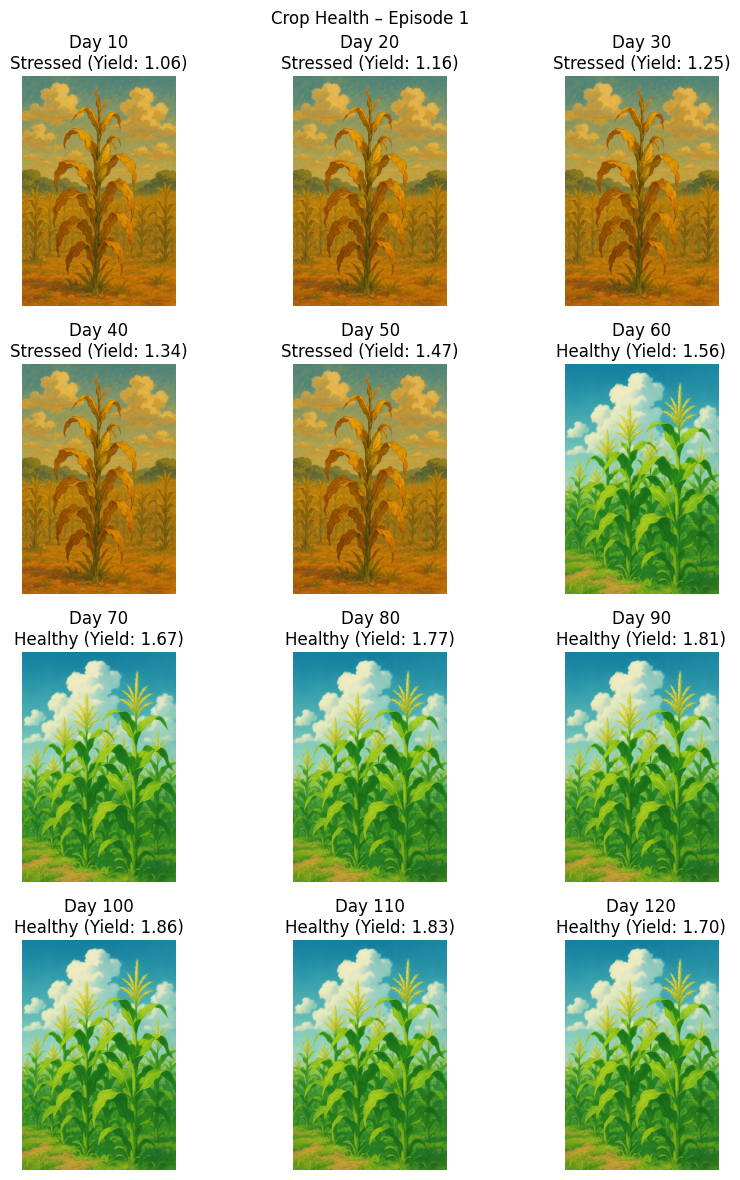

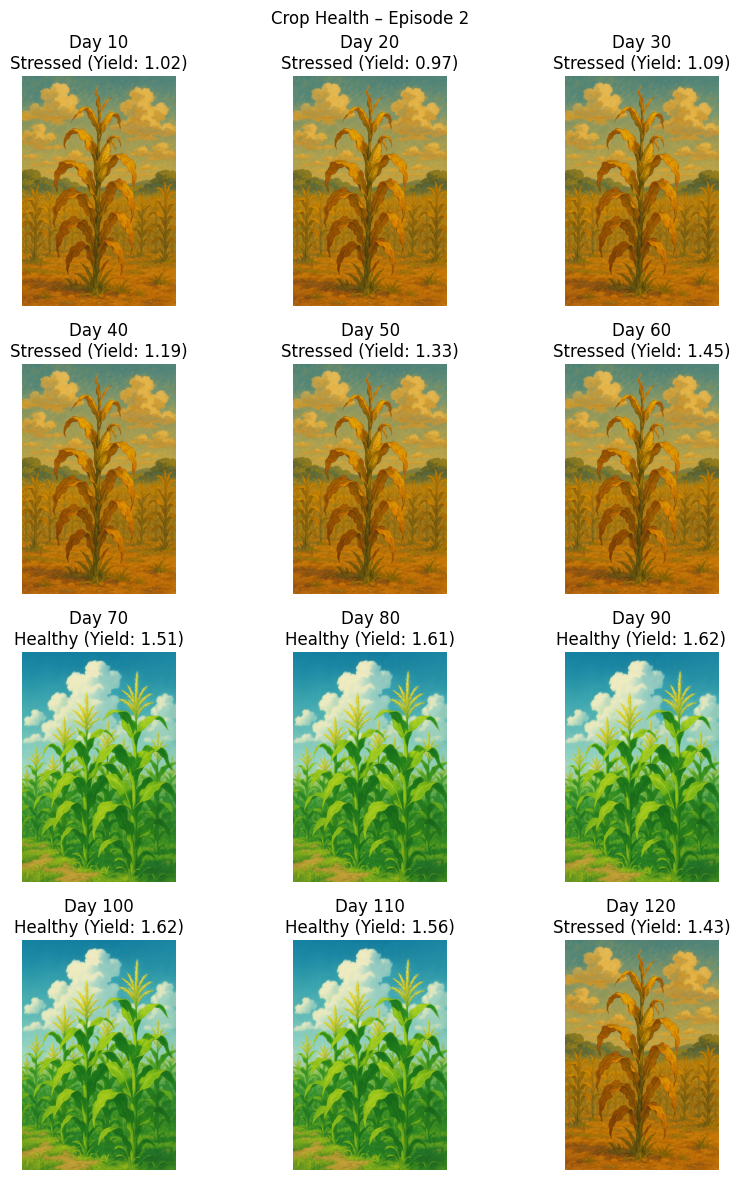

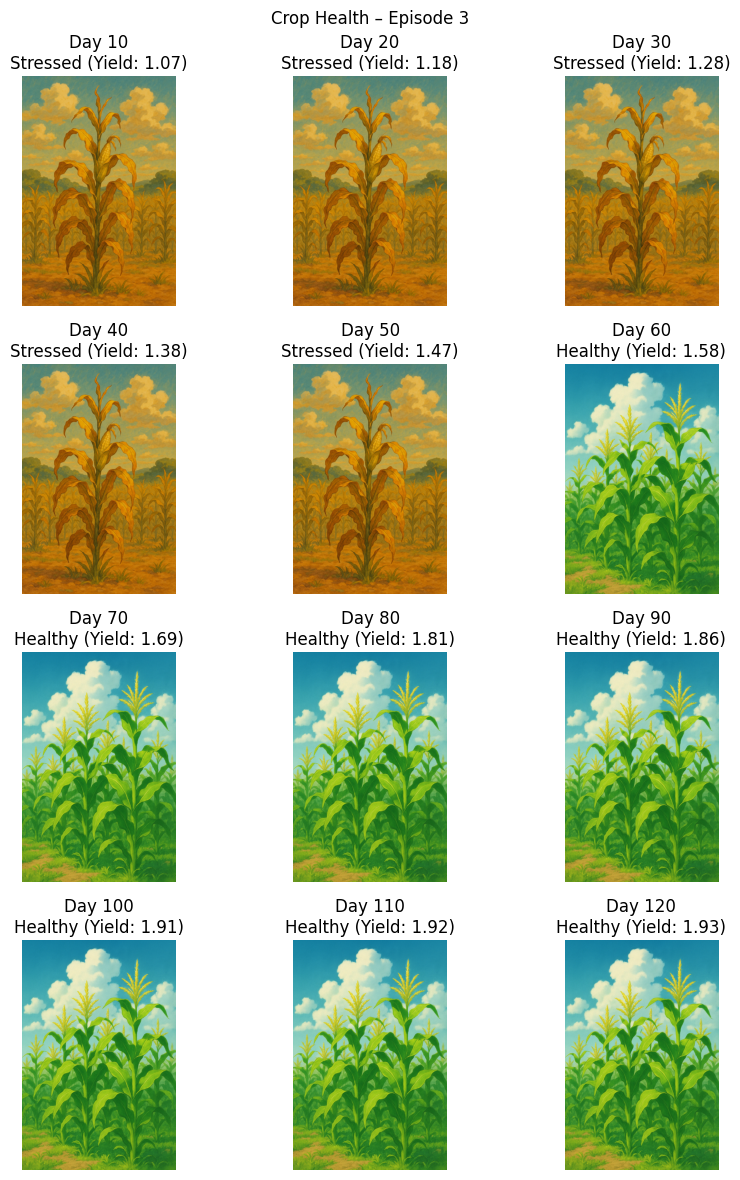

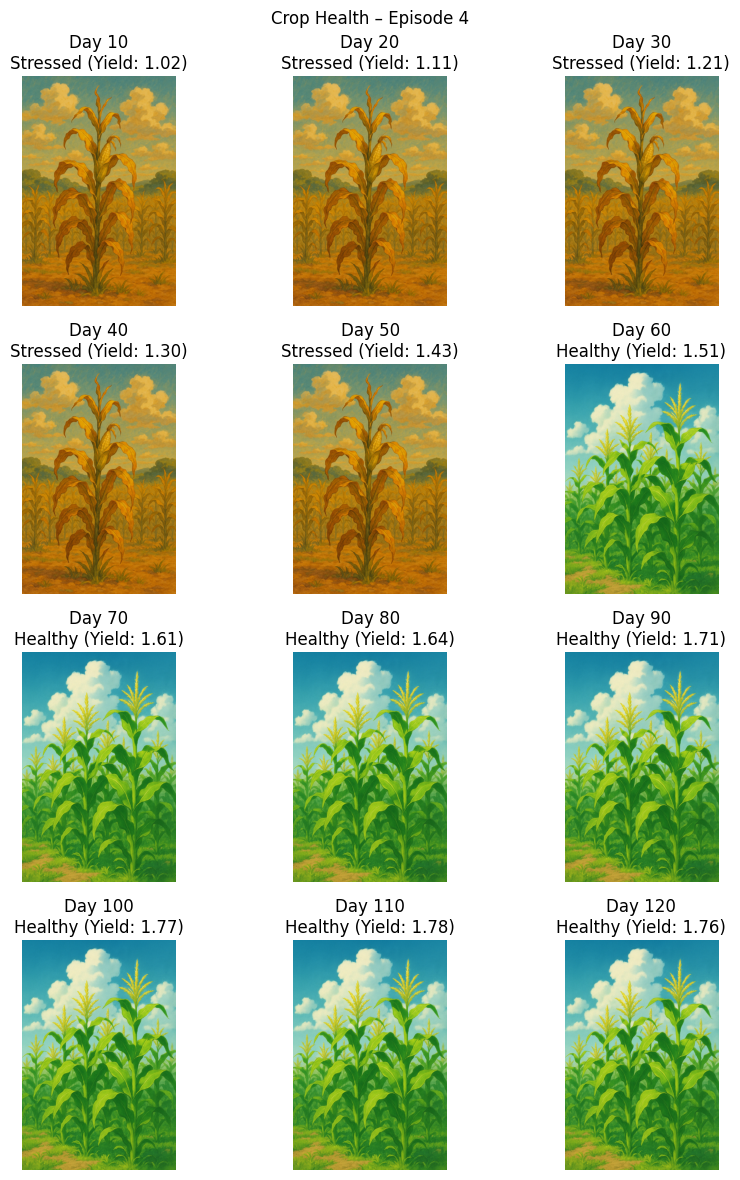

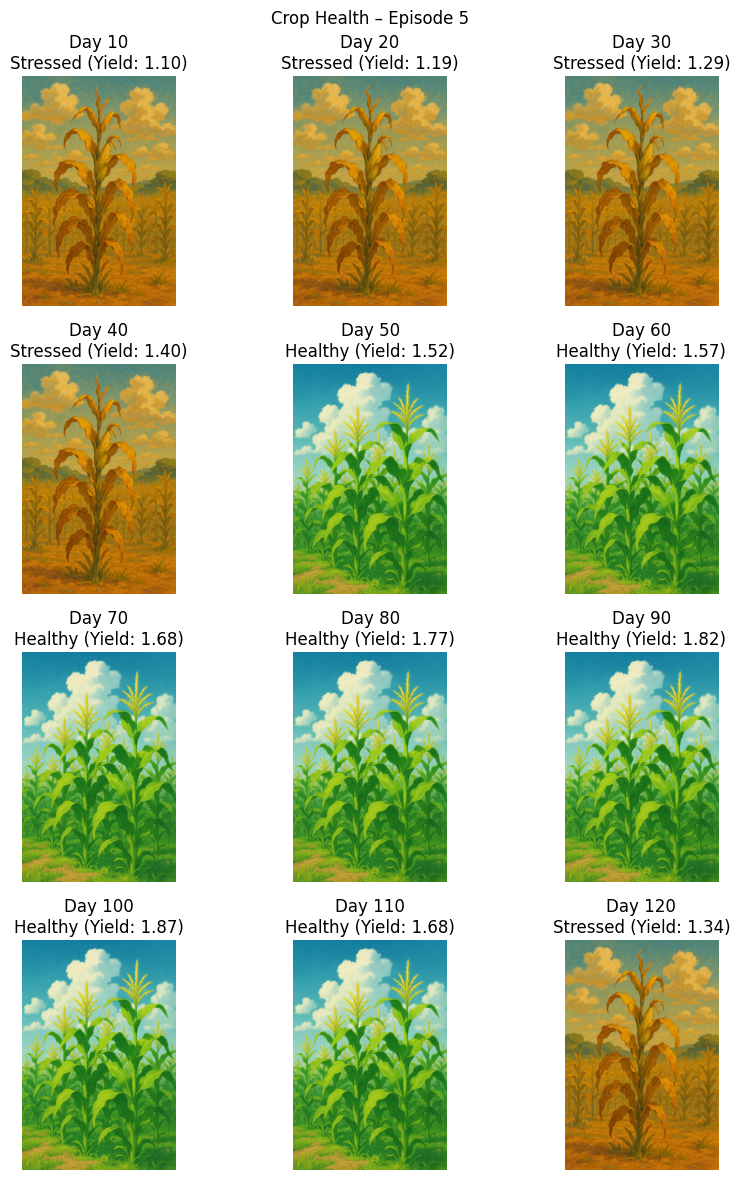

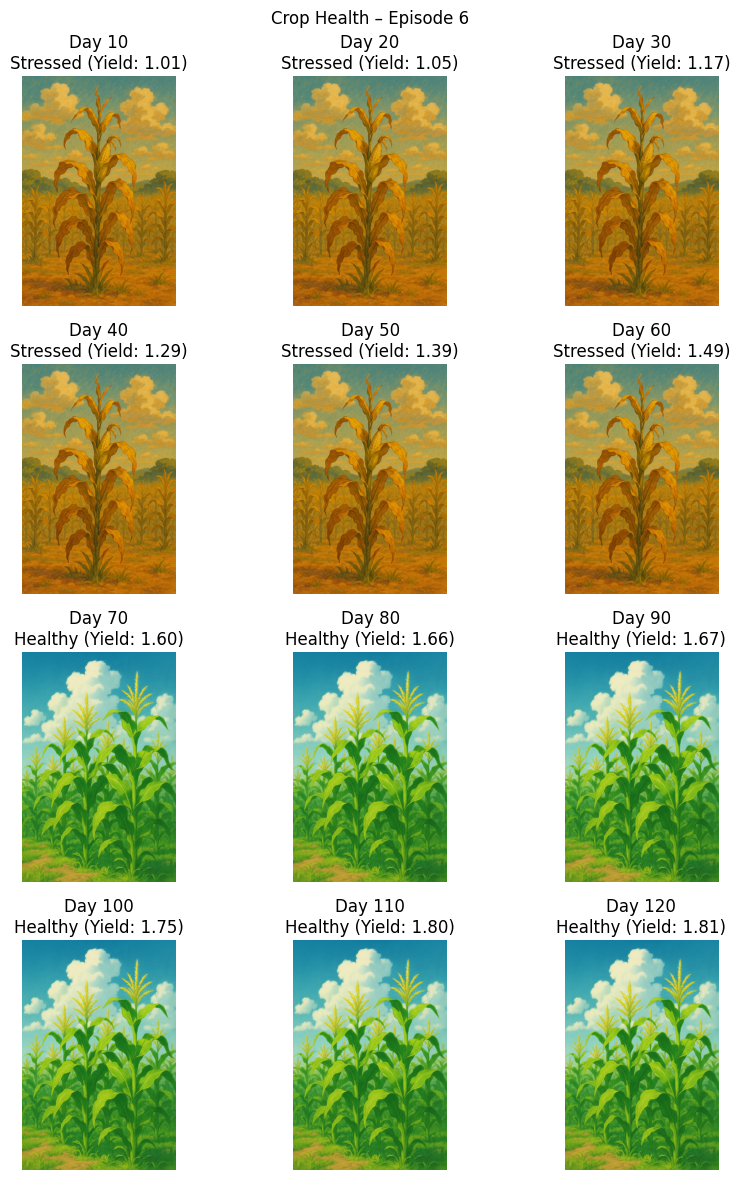

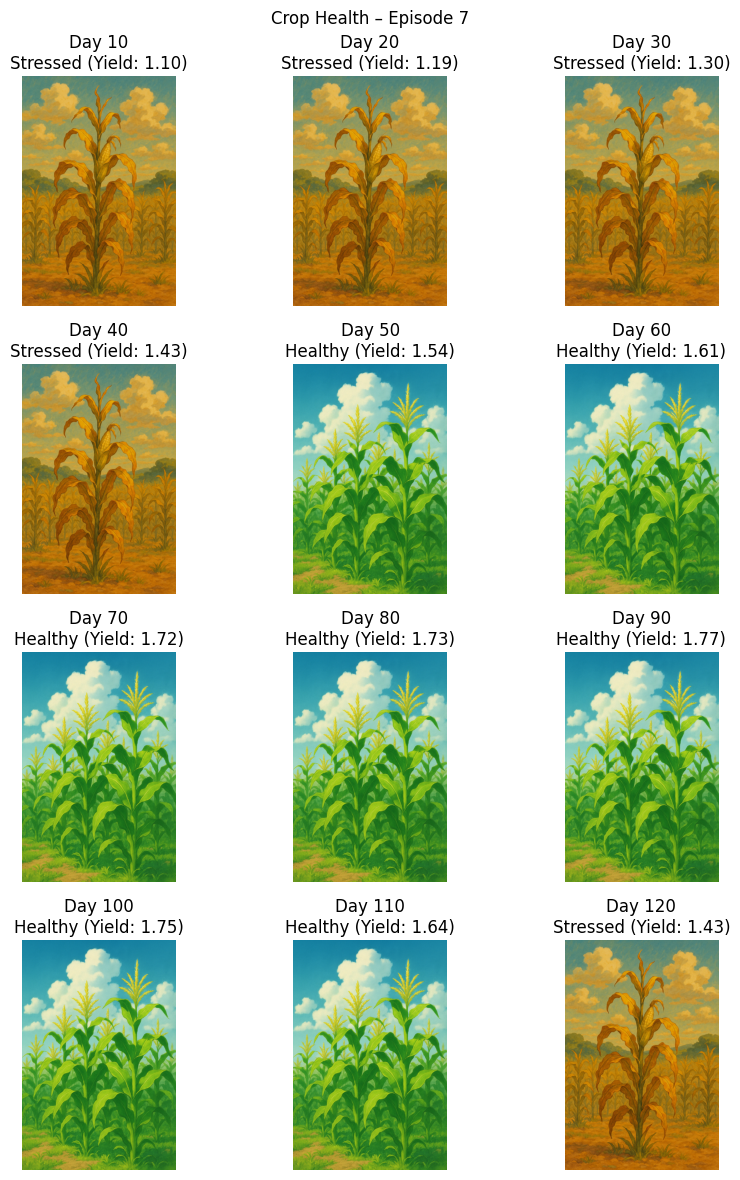

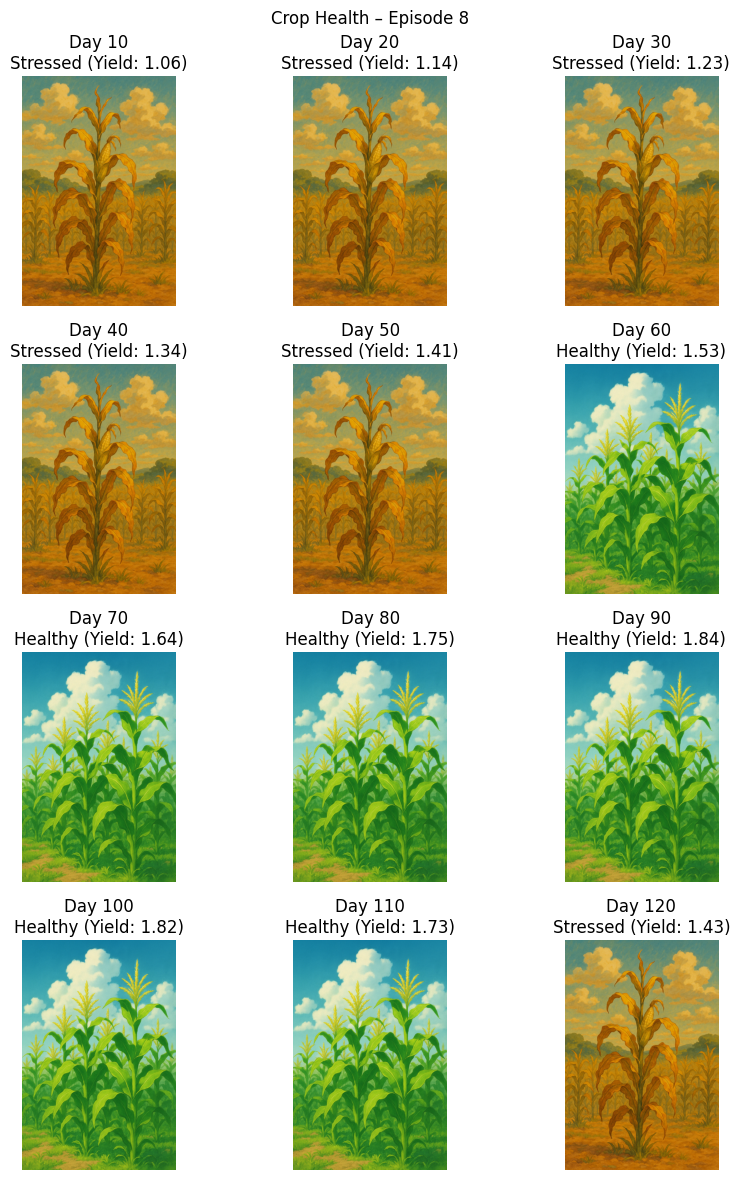

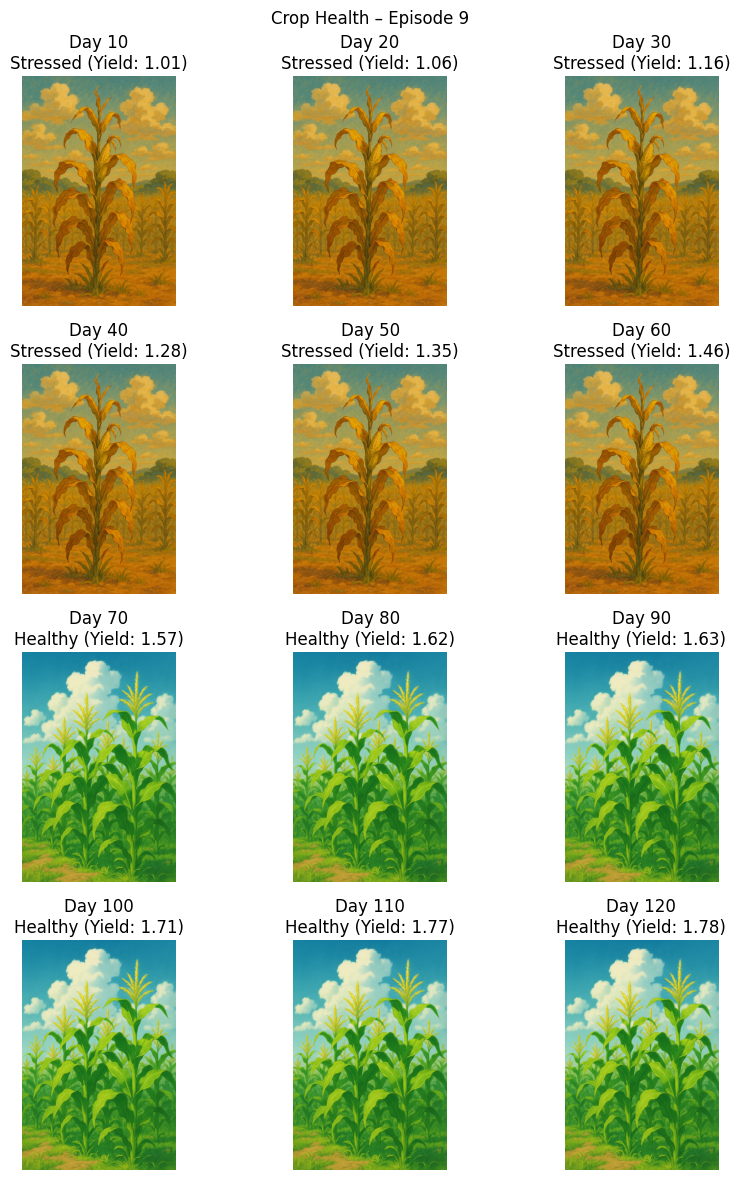

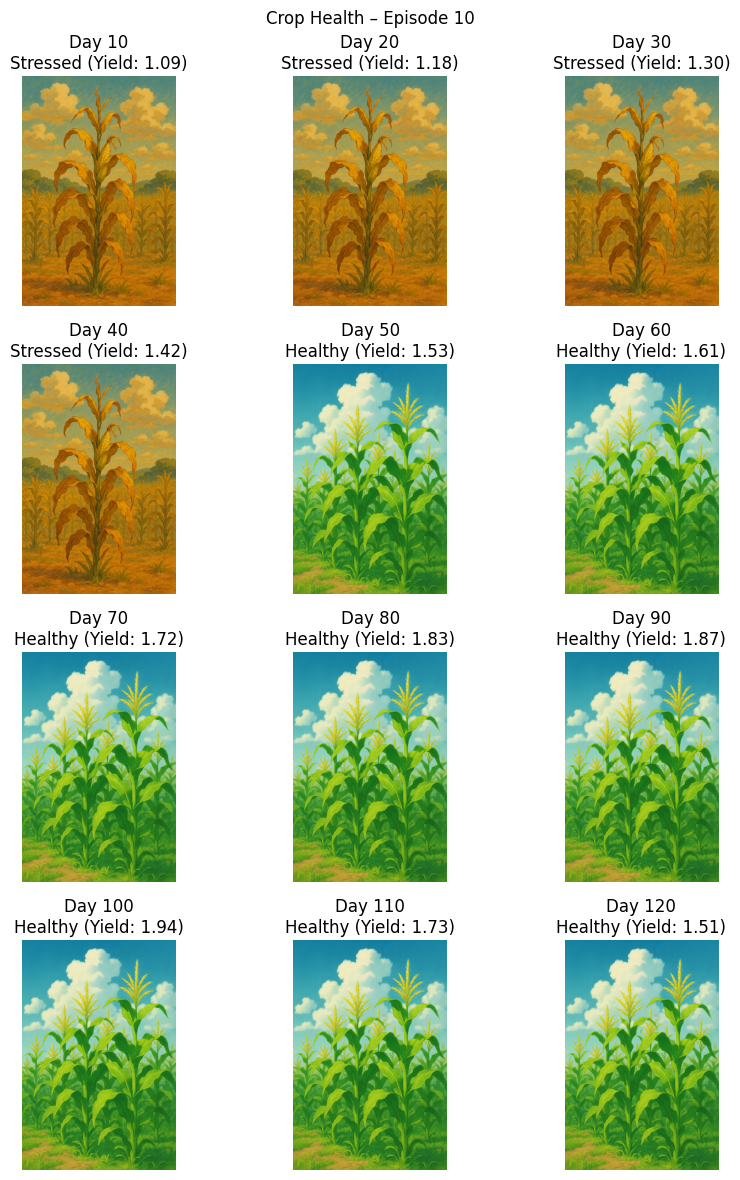


📊 Crop Report 📊
🌽 Yield: 1.61 (range: 1.34 – 1.93)
💧 Water Used: 186.00 mm
🌱 Moisture: 74.42% avg
📈 Seasons: 10


episode  total_reward  final_yield_potential  total_water_used  \
0        0   1324.309082               1.696818               195   
1        1    954.546471               1.427441               170   
2        2   1434.656140               1.929269               180   
3        3   1267.266911               1.762782               195   
4        4   1262.244178               1.340736               180   
5        5   1265.034601               1.805577               180   
6        6   1055.579931               1.426332               195   
7        7   1213.106370               1.433439               210   
8        8   1266.712933               1.783549               180   
9        9   1227.183021               1.506384               175   

   avg_soil_moisture  
0          74.363110  
1          78.106405  
2          73.912255  
3          72.645117  
4          75.788086  
5          72.586653  
6          74.652916  
7          75.371942  
8          71.705339  
9          75.022144

In [7]:
dqn_trainer.evaluate_model(model=model, env=env,n_eval_episodes=10,)

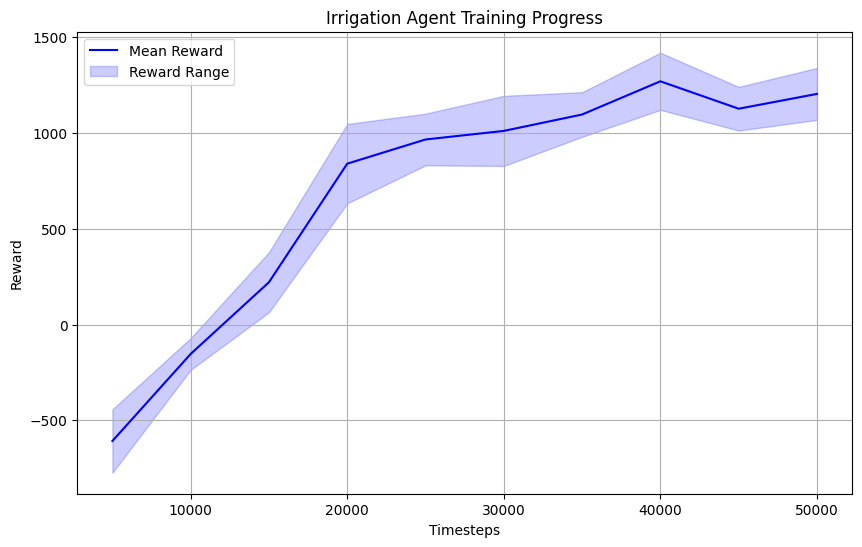

In [8]:
dqn_trainer.plot_simple_training_progress()


===== Running Complete Growing Season Simulation =====
Day  10 | Stage: Seedling  | Action: 0 ( 0mm) | Soil Moisture: 83.3% | Yield: 1.05
Day  20 | Stage: Jointing  | Action: 0 ( 0mm) | Soil Moisture: 77.3% | Yield: 1.11
Day  30 | Stage: Jointing  | Action: 0 ( 0mm) | Soil Moisture: 68.2% | Yield: 1.23
Day  40 | Stage: Staminate | Action: 0 ( 0mm) | Soil Moisture: 71.2% | Yield: 1.32
Day  50 | Stage: Staminate | Action: 3 (15mm) | Soil Moisture: 76.9% | Yield: 1.41
Day  60 | Stage: Filling   | Action: 0 ( 0mm) | Soil Moisture: 86.7% | Yield: 1.52
Day  70 | Stage: Filling   | Action: 3 (15mm) | Soil Moisture: 83.3% | Yield: 1.64
Day  80 | Stage: Filling   | Action: 0 ( 0mm) | Soil Moisture: 70.0% | Yield: 1.76
Day  90 | Stage: Maturity  | Action: 0 ( 0mm) | Soil Moisture: 72.1% | Yield: 1.81
Day 100 | Stage: Maturity  | Action: 0 ( 0mm) | Soil Moisture: 76.0% | Yield: 1.86
Day 110 | Stage: Maturity  | Action: 0 ( 0mm) | Soil Moisture: 83.3% | Yield: 1.87
Day 120 | Stage: Maturity  | Ac

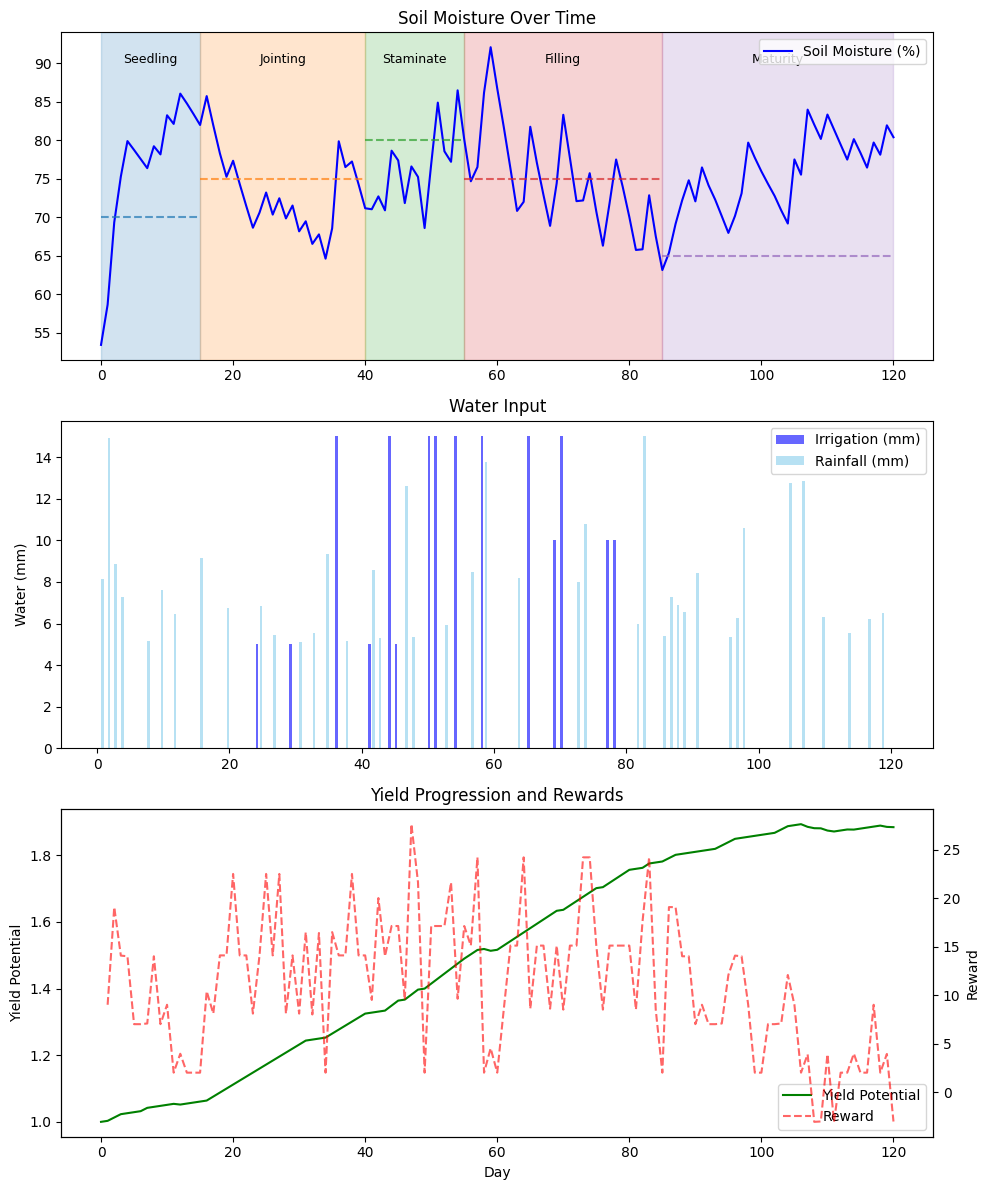


--- Season Summary ---
Final Yield: 1.88
Total Water Used: 170.0 mm
Total Rainfall: 326.7 mm
Water Efficiency: 1.108

Season Performance Metrics:
Total Reward: 1380.47
Final Yield: 1.88
Water Used: 170.0 mm
Water Efficiency: 0.0111


In [9]:
print("\n===== Running Complete Growing Season Simulation =====")
reward, yield_potential, water_used = dqn_trainer.run_single_episode(
        model=model,
        env=env,
        render=True,
        seed=100,
        visualize=True
)

print("\nSeason Performance Metrics:")
print(f"Total Reward: {reward:.2f}")
print(f"Final Yield: {yield_potential:.2f}")
print(f"Water Used: {water_used:.1f} mm")
print(f"Water Efficiency: {yield_potential/water_used:.4f}")